# Assignment for Fundamentals of Data Analysis - Tasks 2020
This jupyter notebook presents the four tasks required as part of the assignment for this module. The four tasks include: <br>
1. count 
2. dicerolls
3. numpy.random.binomial
4. numpy.linspace
***
### References
[1]. Whirlwind Tour of Python https://jakevdp.github.io/WhirlwindTourOfPython/ <br>
[2]
 https://stackoverflow.com/questions/34498203/count-items-in-list-and-make-it-a-dictionary <br>
[3] https://www.geeksforgeeks.org/get-method-dictionaries-python/#:~:text=In%20python%20dictionaries%2C%20following%20is,a%20value%20for%20a%20key.&text=The%20get()%20method%20is,if%20present%20in%20the%20dictionary. <br>
[4] https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/#:~:text=PRNGs%20are%20suitable%20for%20applications,are%20simulation%20and%20modeling%20applications.<br>
[5] https://numpy.org/ <br>
[6] https://stackoverflow.com/questions/50912819/how-to-combine-two-bar-chart-of-two-files-in-one-diagram-in-matplotlib-pandas <br>
[7] https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20also%20goes,when%20these%20groups%20are%20combined. <br>


## count
This Python function takes a list as input and returns a dictionary of unique items in the list as keys and the number of
times each item appears as values.<br>
A dictionary is a collection of keys and values and maps keys to values[1].

In [1]:
# define the function
def count(y):
    # create a dictionary which will use input as keys and the number of times each item appears in the input list as the values
    d = {}
    for i in y:
         # using .get method returns the value for the given key, if present in the dictionary 
         #If not, then it will return none [2, 3].
        d[i] = d.get(i, 0) + 1
    return d

# create some data 
my_list = ['A', 'A', 'B', 'C', 'A',]

# now we call the function
count(my_list)


{'A': 3, 'B': 1, 'C': 1}

## dicerolls
This function simulates rolling a dice. The function take two parameters: the number of dice k and the number of times to roll the dice n. The function simulates randomly rolling k dice n times, keeping track of each total face value and returns a dictionary with the number of times each possible total face value occurred.

The diceroll function has returned {7: 177, 6: 133, 11: 58, 10: 95, 4: 84, 3: 45, 2: 25, 8: 140, 5: 113, 9: 107, 12: 23}


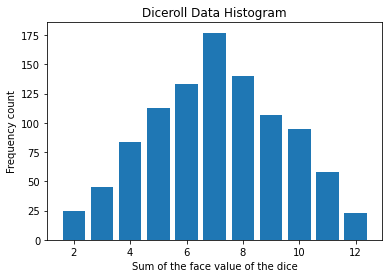

In [2]:
import numpy as np
# using default_rng() will get a new instance of a Generator with the default BitGenerator (PCG64).
rng = np.random.default_rng()


def diceroll(k, n):
    # create an empty list to start
    l = []
    for i in range(n):
        # this will generate random integers with a value from 1 up to, but not inclusive of, 7 
        # with size equal to k meaning that k number of values will be returned
        a = rng.integers(1, 7, size = k)
        # using sum will add up the elements in the array a
        s = sum(a)
        # add the sum value into the list 
        l.append(s)
    # now call the count function defined above for the list l
    v = count(l)
    return v
  
# using the data outlined in the question where k = 2 and n = 1000    
dice_data = diceroll(2,1000)
print("The diceroll function has returned", dice_data)

import matplotlib.pyplot as plt
import seaborn as sns

# a histogram will provide a visual representation of the data
plt.bar(dice_data.keys(), dice_data.values())
plt.xlabel("Sum of the face value of the dice")
plt.ylabel("Frequency count")
plt.title("Diceroll Data Histogram")
plt.show()
    


## numpy.random.binomial
This function simulate flipping a coin with a 50/50 chance of heads or tails. The numpy.random library allows for the use of pseudorandom numbers, this is suitable for applications where many random numbers are required [4] and the binomial distribution stimulates the flipping of a coin where the outcome is either head or tails [5] so there is a 50/50 or .5 chance of heads being the outcome of the action. I wasn't sure if I using the numpy.random.binomial function was permitted in this task so there are two python codes presented below. These codes simulates flipping a coin 100 times and the code is run 1,000 times,  keeping track of the number of heads in each of the 1,000 simulations. The barchart plot that is presented below uses the Seaborn package and presents the two datasets from two methods of flipping the coin to show they are comparable in their distributions.  

The coinflip() function has returned {51: 84, 49: 85, 48: 69, 47: 73, 42: 21, 50: 74, 43: 25, 58: 24, 54: 56, 55: 49, 56: 38, 53: 64, 36: 3, 66: 2, 46: 54, 57: 42, 62: 3, 40: 16, 52: 87, 45: 41, 39: 8, 44: 28, 59: 15, 41: 14, 61: 5, 60: 10, 38: 5, 65: 1, 67: 1, 63: 2, 37: 1}
The numpy.random.binomial() function when passed through the count() function returns {46: 61, 56: 40, 48: 72, 42: 14, 45: 54, 51: 63, 50: 80, 49: 84, 44: 28, 54: 53, 43: 24, 47: 76, 55: 47, 61: 11, 57: 31, 38: 9, 52: 95, 59: 16, 67: 1, 53: 61, 60: 14, 58: 17, 39: 8, 40: 7, 37: 3, 35: 1, 41: 15, 33: 1, 64: 3, 68: 2, 65: 2, 36: 2, 63: 3, 32: 1, 62: 1}


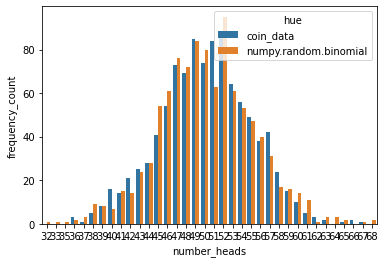

In [3]:
# k will be the number of coin flips per simulation
# n will be the number of simulations 

# in order to present the data from two different methods of achieving the same outcome I will use a barchart
# two dataframes will be represented on the barchart one from a function that I wrote and one from numpy.random.binomial
# the numpy.random.binomial parameters are described in the numpy documentation [5]
import pandas as pd

def coinflip(k, n):
    # using a similar approach to the function diceroll() above, we create an empty list to start
    l = []
    for i in range(n):
        # we generate a random integers 0 or 1, where 0 is tails and 1 is heads 
        # with size equal to k number of values
        a = rng.integers(2, size = k)
        # using sum will add up the elements in the array a - this will be the number of heads
        num_heads = sum(a)
        # add the sum value into the list 
        l.append(num_heads)
    # now call the count function defined above for the list l
    v = count(l)
    return v

# using the data outlined in the question where the coin is flipped a 100 times (k=100) and this is simulated 1000 times(n=1000)
coin_data = coinflip(100,1000)
print("The coinflip() function has returned", coin_data)


#rng = np.random.default_rng() has already been called above
# n is the number of trials which is 100, and p is the probability of each trial
n, p, = 100, .5 
# result of flipping a coin 100 times, tested 1000 times
b = rng.binomial(n, p, 1000)
# so using the count function that was created in task 1 to create a dictionary to count the unique items in the list
num_bin = count(b)
print("The numpy.random.binomial() function when passed through the count() function returns", num_bin)


# a barchat will provide a visual representation of the two sets of data - this technique was presented in reference [6].
df1=pd.DataFrame({'number_heads':coin_data.keys(),'frequency_count':coin_data.values()})
df2=pd.DataFrame({'number_heads':num_bin.keys(),'frequency_count':num_bin.values()})
df1['hue']="coin_data"
df2['hue']="numpy.random.binomial"
res=pd.concat([df1,df2])
sns.barplot(x='number_heads', y='frequency_count', data=res, hue='hue')
plt.show()


## numpy.linspace
Four data sets are created using numpy. Each data set has an x array and a corresponding y array.  The x arrays are created using numpy.linspace and the y arrays are created using y = a * x + b where a and b are chosen for each x , y pair to demonstrate Simpson’s paradox. Simpson's paradox is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined. This result is often encountered in social-science and medical-science statistics [7]. 

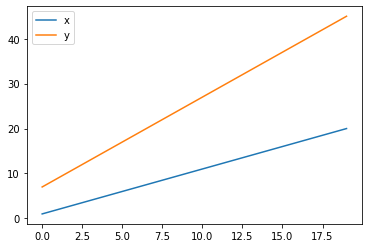

In [22]:

a = 2
b = 5
# create a data set with x array using numpy.linspace
x = np.linspace(1.0, 20.0, num=20)
y = a*x + b
# using these x and y arrays to set up a dataframe with pandas library
df1=pd.DataFrame({'x':x,'y':y})
df1.plot()
plt.show()